<a href="https://colab.research.google.com/github/antonioravila/Alura-Cursos/blob/main/VGSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados - Video Game Sales (ubisoft)

(depois de pronto o projeto, escrever uma introdução aqui)



---



---


**Carregamento das bibliotecas e dos dados**


---



---



In [370]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
plt.rc('figure', figsize = (15,8))

In [371]:
# Carregando o dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/CSV/vgsales.csv")

In [372]:
# Visualizando as 5 primeiras colunas no dataset
dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [373]:
# Visualizando as 5 ultimas colunas no dataset
dataframe.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.0,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.0,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.0,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01
16323,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01


In [374]:
# Mudando as colunas para o português

dataframe.columns = ["Ranking", "Nome", "Plataforma", "Ano", 
"Genero", "Editora", "vendas_America_do_Norte", "vendas_Europa", "vendas_Japao", 
"vendas_outras", "vendas_Globais"]

dataframe.head()

,Ranking,Nome,Plataforma,Ano,Genero,Editora,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras,vendas_Globais
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [375]:
# Checando quais colunas tem valores nulos em seus registros
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  16324 non-null  int64  
 1   Nome                     16324 non-null  object 
 2   Plataforma               16324 non-null  object 
 3   Ano                      16324 non-null  int64  
 4   Genero                   16324 non-null  object 
 5   Editora                  16288 non-null  object 
 6   vendas_America_do_Norte  16324 non-null  float64
 7   vendas_Europa            16324 non-null  float64
 8   vendas_Japao             16324 non-null  float64
 9   vendas_outras            16324 non-null  float64
 10  vendas_Globais           16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [376]:
len(dataframe[dataframe['Editora'].isnull()])

36

In [377]:
# Visualisando as descrições estatísticas do dataset
dataframe[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras', 'vendas_Globais']].describe().round(2)

,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras,vendas_Globais
count,16324.00,16324.00,16324.00,16324.00,16324.00
mean,0.27,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.57
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.04,0.48
max,41.49,29.02,10.22,10.57,82.74




---



---


**Qual a quantidade de vendas ao longo dos anos?**


---



---



In [382]:
por_ano = dataframe.groupby('Ano')
vendas_por_ano = por_ano['vendas_Globais'].sum()

vendas_por_ano = pd.DataFrame(vendas_por_ano)
vendas_por_ano = vendas_por_ano.reset_index()
vendas_por_ano.head(5)

,Ano,vendas_Globais
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


Text(0.5, 0.98, 'Vendas globais ao longo dos anos')

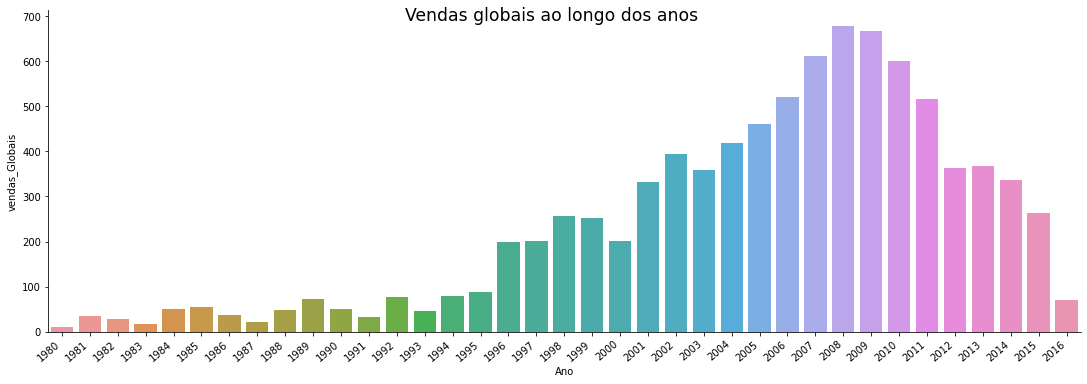

In [383]:
gráfico_vendasGlobais_porAno = sns.catplot(
    data = vendas_por_ano,
    x = 'Ano', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3    
)

gráfico_vendasGlobais_porAno.set_xticklabels(rotation = 40, horizontalalignment='right')
gráfico_vendasGlobais_porAno.fig.suptitle('Vendas globais ao longo dos anos', fontsize = 'xx-large')

---
---


**Qual a distribuição da vendas globais?**

---
---

In [378]:
area = plt.figure(figsize=[20, 10])

<Figure size 1440x720 with 0 Axes>

In [379]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [380]:
g1.boxplot(dataframe['vendas_Globais'])
g1.set_title('Distribuição das Vendas Globais (100%)')
g1.set_ylabel('Milhões de Unidades Vendidas')

g2.boxplot(dataframe.query('vendas_Globais <= 0.48')['vendas_Globais'])
g2.set_title('Distribuição das Vendas Globais (75%)')


g3.hist(dataframe['vendas_Globais'], bins=40)
g3.set_title('Distribuição das Vendas Globais (100%)')
g3.set_xlabel('Milhões de Unidades Vendidas')
g3.set_ylabel('Quantidade de Jogos')

g4.hist(dataframe.query('vendas_Globais <= 0.48')['vendas_Globais'], bins=40)
g4.set_title('Distribuição das Vendas Globais (75%)')

Text(0.5, 1.0, 'Distribuição das Vendas Globais (75%)')

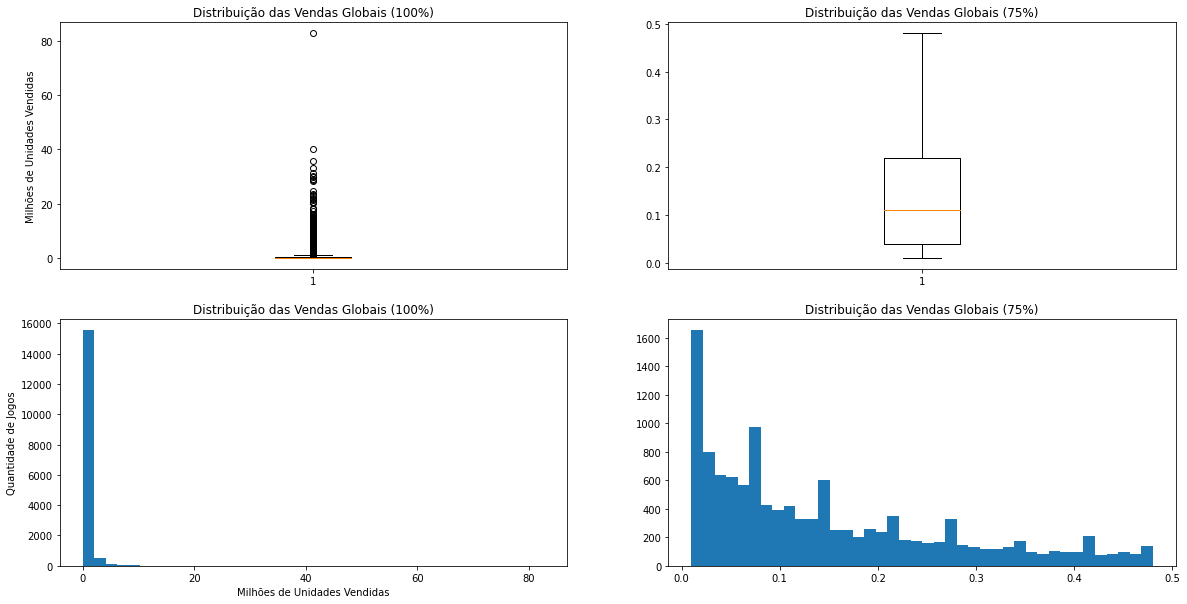

In [381]:
area



---


Nota-se, ao checar a distribuição de 100% das vendas globais, uma enorme assimetria. Tendo isso em vista,foram feitos então os gráficos da direita, que representam 75% dos Video Games, excluindo os 25% que mais venderam.


---



---
---

**Quais são os 20 Video Games que mais venderam?**

---
---

In [369]:
dataframe.sort_values(by='Ranking').head(20)

,Ranking,Nome,Plataforma,Ano,Genero,Editora,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras,vendas_Globais
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8322,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
9750,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
188,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6113,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9751,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
108,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


---
---

**Quais são as editoras que mais venderam?**

---
---

In [104]:
# Separando as vendas globais por editora, e depois transformando em um dataset
por_editora = dataframe.groupby('Editora')
vendasPor_editora = por_editora['vendas_Globais'].sum().sort_values(ascending=False).head(15)

vendasPor_editora = pd.DataFrame(vendasPor_editora)
vendasPor_editora = vendasPor_editora.reset_index()
vendasPor_editora

,Editora,vendas_Globais
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.66
9,Namco Bandai Games,253.65


Text(0.5, 0.98, 'Vendas por editoras')

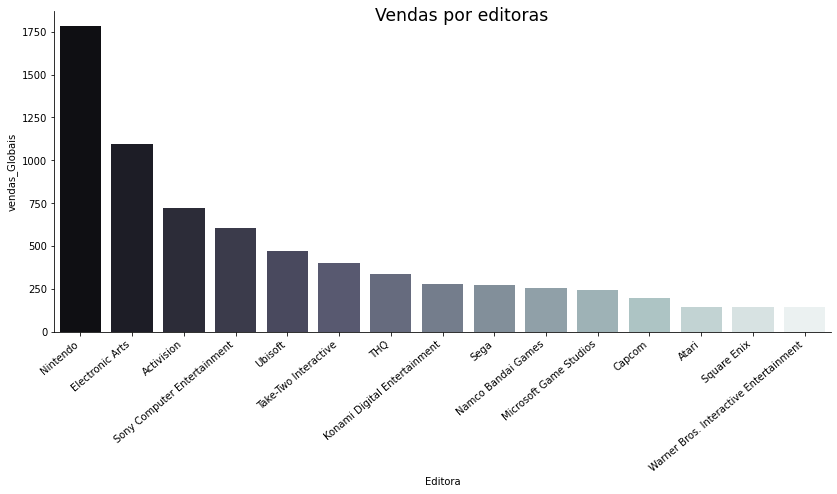

In [105]:
# Plotando um gráfico que demonstra as vendas globais das 10 editoras que mais vendem
grafico_vendasGlobais_porEditora = sns.catplot(
    data = vendasPor_editora,
    x = 'Editora', 
    y = 'vendas_Globais',
    kind = 'bar',
    palette = 'bone',
    aspect = 2.5    
)

grafico_vendasGlobais_porEditora.set_xticklabels(rotation = 40, horizontalalignment='right')
grafico_vendasGlobais_porEditora.fig.suptitle('Vendas por editoras', fontsize = 'xx-large')

In [106]:
vendasPor_editora.mean()

vendas_Globais    473.482667
dtype: float64

In [107]:
vendasPor_editora.median()

vendas_Globais    278.56
dtype: float64